## Day 35 Lecture 2 Assignment

In this assignment, we will learn combine what we have learned so far about classification algorithms this week.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.ensemble import GradientBoostingClassifier

warnings.filterwarnings('ignore')

In [0]:
admission = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Admission_Predict.csv')

In [0]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In this assignment, we will predict the probability of a student being admitted to a PhD program given their stats. To make the predictions, find the median for the Chance of Admit column. Create an admit column where all probabilities above the median will receive a 1 for that column and all probabilities below the median will be a zero.

Below you will process and clean the data, try the SVM classifier, the gradient boosted decision tree classifier and XGBoost, and compare your results.

Have fun!

In [0]:
# Answer below:

In [0]:
admission.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [0]:
admission['Chance of Admit '].median()

0.73

In [0]:
admission['Admit Over Median'] = admission['Chance of Admit '] > admission['Chance of Admit '].median()

In [0]:
admission.head()
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
Admit Over Median    400 non-null bool
dtypes: bool(1), float64(4), int64(5)
memory usage: 28.6 KB


In [0]:
x_cols = [x for x in admission.columns if x != 'Admit Over Median']

scaler = StandardScaler()
scaler.fit(admission[x_cols])
admission_scale = scaler.transform(admission[x_cols])
x_scale = pd.DataFrame(admission_scale, columns=x_cols)
x_scale.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,-1.727726,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112,1.373648
1,-1.719066,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112,0.250297
2,-1.710406,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112,-0.030541
3,-1.701745,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112,0.531135
4,-1.693085,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975,-0.522007


In [0]:
y = admission['Admit Over Median']
X = x_scale

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=21)

In [0]:
# SVC with defaults

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
svc.score(X_train, y_train), svc.score(X_test, y_test)

(0.95625, 0.9)

In [0]:
y_test_predict = svc.predict(X_test)
def conf_matrix(y_true, y_predict):
  data = confusion_matrix(y_true, y_predict)
  index = ['Actual_0', 'Actual_1']
  columns = ['Predicted_0', 'Predicted_1']
  return pd.DataFrame(data, index, columns)
  
conf_matrix(y_test, y_test_predict)

,Predicted_0,Predicted_1
Actual_0,35,5
Actual_1,3,37


In [0]:
c_range = np.logspace(-6, 6, num=13)
c_range

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [0]:
params = {'kernel': ['linear', 'rbf'], 'C': c_range} 
grid = GridSearchCV(svc, param_grid=params, cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'C': 100.0, 'kernel': 'linear'}
0.9925


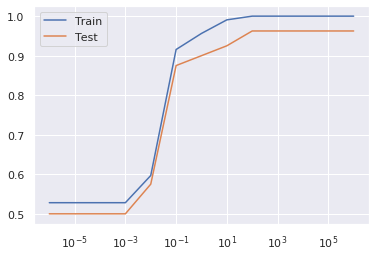

In [0]:
train_scores = []
test_scores = []

for C in c_range:
  svc = SVC(C=C)
  svc.fit(X_train, y_train)
  train_scores.append(svc.score(X_train, y_train))
  test_scores.append(svc.score(X_test, y_test))

ax = sns.lineplot(x=c_range, y=train_scores, label='Train')
sns.lineplot(x=c_range, y=test_scores, label='Test')
ax.set_xscale('log')

In [0]:
tuned_svc = SVC(kernel='linear', C=100)
tuned_svc.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
tuned_svc.score(X_train, y_train), tuned_svc.score(X_test, y_test)

(1.0, 0.9875)

In [0]:
y_tuned_test_predict = tuned_svc.predict(X_test)
def conf_matrix(y_true, y_predict):
  data = confusion_matrix(y_true, y_predict)
  index = ['Actual_0', 'Actual_1']
  columns = ['Predicted_0', 'Predicted_1']
  return pd.DataFrame(data, index, columns)
  
conf_matrix(y_test, y_tuned_test_predict)

,Predicted_0,Predicted_1
Actual_0,39,1
Actual_1,0,40


In [0]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
gbc.score(X_train, y_train), gbc.score(X_test, y_test)

(1.0, 1.0)

In [0]:
xgb.score(X_train, y_train), xgb.score(X_test, y_test)

(1.0, 1.0)